#  DIGITAL CURRENCY MARKET (USD & SAR)
                --daily historical time series--  
                
                
----


- This dataset was prepared using  [Alpha Vantage API](https://rapidapi.com/alphavantage/api/alpha-vantage) 
- API documentation can be found [here](https://www.alphavantage.co/documentation/)
- This API returns the daily historical time series for a digital currency (e.g., BTC) traded on a specific market (here, SAR/Sudi Riyal), refreshed daily at midnight (UTC). 
- Prices and volumes are quoted in both the market-specific currency (SAR) and USD.
- Historical date range: 2018-05-11 to 30.01.2021


#### [Kaggle Dataset](https://www.kaggle.com/ahmedadam415/digital-currency-time-series)

### Imports

In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### 1. Calling service API

In [2]:
# url = "https://alpha-vantage.p.rapidapi.com/query"

# querystring = {"market":"SAR","symbol":"BTC","function":"DIGITAL_CURRENCY_DAILY"}

# headers = {
#     'x-rapidapi-key': "4afe0e813cmsh1845dd312b3d16ap17f7c2jsnd0618999bd5c",
#     'x-rapidapi-host': "alpha-vantage.p.rapidapi.com"
#     }

# response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

{
    "Meta Data": {
        "1. Information": "Daily Prices and Volumes for Digital Currency",
        "2. Digital Currency Code": "BTC",
        "3. Digital Currency Name": "Bitcoin",
        "4. Market Code": "SAR",
        "5. Market Name": "Saudi Riyal",
        "6. Last Refreshed": "2021-01-30 00:00:00",
        "7. Time Zone": "UTC"
    },
    "Time Series (Digital Currency Daily)": {
        "2021-01-30": {
            "1a. open (SAR)": "128437.24851200",
            "1b. open (USD)": "34246.28000000",
            "2a. high (SAR)": "131012.72320000",
            "2b. high (USD)": "34933.00000000",
            "3a. low (SAR)": "123106.88000000",
            "3b. low (USD)": "32825.00000000",
            "4a. close (SAR)": "128333.21241600",
            "4b. close (USD)": "34218.54000000",
            "5. volume": "43072.12268000",
            "6. market cap (USD)": "43072.12268000"
        },
        "2021-01-29": {
            "1a. open (SAR)": "125144.02227200",
            "1

In [3]:
# exploring json file
response.json()

{'Meta Data': {'1. Information': 'Daily Prices and Volumes for Digital Currency',
  '2. Digital Currency Code': 'BTC',
  '3. Digital Currency Name': 'Bitcoin',
  '4. Market Code': 'SAR',
  '5. Market Name': 'Saudi Riyal',
  '6. Last Refreshed': '2021-01-30 00:00:00',
  '7. Time Zone': 'UTC'},
 'Time Series (Digital Currency Daily)': {'2021-01-30': {'1a. open (SAR)': '128437.24851200',
   '1b. open (USD)': '34246.28000000',
   '2a. high (SAR)': '131012.72320000',
   '2b. high (USD)': '34933.00000000',
   '3a. low (SAR)': '123106.88000000',
   '3b. low (USD)': '32825.00000000',
   '4a. close (SAR)': '128333.21241600',
   '4b. close (USD)': '34218.54000000',
   '5. volume': '43072.12268000',
   '6. market cap (USD)': '43072.12268000'},
  '2021-01-29': {'1a. open (SAR)': '125144.02227200',
   '1b. open (USD)': '33368.18000000',
   '2a. high (SAR)': '144510.03776000',
   '2b. high (USD)': '38531.90000000',
   '3a. low (SAR)': '119695.51616000',
   '3b. low (USD)': '31915.40000000',
   '4a. 

### 2. Parsing JSON & converting into DataFrame


In [4]:
json = response.json()
json_1 = json['Time Series (Digital Currency Daily)'] # assigning main dict in a variable

# converting into a dataframe to avoid repetitive API calls
json_1_df = pd.DataFrame(json_1) 
json_1_df.head()

,2021-01-30,2021-01-29,2021-01-28,2021-01-27,2021-01-26,2021-01-25,2021-01-24,2021-01-23,2021-01-22,2021-01-21,...,2018-05-16,2018-05-15,2018-05-14,2018-05-13,2018-05-12,2018-05-11,2018-05-10,2018-05-09,2018-05-08,2018-05-07
1a. open (SAR),128437.24851200,125144.02227200,113870.35737600,121753.02310400,120966.11417600,120985.84128000,120305.33120000,123575.68000000,115707.30329600,133020.04979200,...,31735.88480000,32491.10284800,32552.38438400,31786.29017600,31525.63737600,33761.88838400,34916.22400000,34421.17120000,35122.49600000,36232.68940800
1b. open (USD),34246.28000000,33368.18000000,30362.19000000,32464.01000000,32254.19000000,32259.45000000,32078.00000000,32950.00000000,30851.99000000,35468.23000000,...,8462.00000000,8663.37000000,8679.71000000,8475.44000000,8405.94000000,9002.21000000,9310.00000000,9178.00000000,9365.00000000,9661.02000000
2a. high (SAR),131012.72320000,144510.03776000,126703.43859200,122102.86041600,123470.21875200,130795.20000000,124029.47840000,125473.38240000,126863.01811200,133514.24000000,...,31833.39520000,33228.50649600,33303.51449600,32866.10534400,32429.25875200,33816.60672000,35235.45804800,35216.25600000,35537.66528000,36340.13836800
2b. high (USD),34933.00000000,38531.90000000,33783.98000000,32557.29000000,32921.88000000,34875.00000000,33071.00000000,33456.00000000,33826.53000000,35600.00000000,...,8488.00000000,8859.99000000,8879.99000000,8763.36000000,8646.88000000,9016.80000000,9395.12000000,9390.00000000,9475.70000000,9689.67000000
3a. low (SAR),123106.88000000,119695.51616000,111919.81184000,109668.14668800,115652.47244800,119675.26400000,115887.36000000,117725.65606400,108199.04000000,112778.27840000,...,30314.52070400,31508.23552000,31042.06080000,31120.81920000,30577.01120000,31282.08640000,33641.08800000,33622.33600000,33980.64921600,34432.42240000


In [77]:
raw_df= json_1_df.transpose() # transposing dataframe dimensions into correct format (wide to long)

In [78]:
raw_df.info() # checking info

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2021-01-30 to 2018-05-07
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   1a. open (SAR)       1000 non-null   object
 1   1b. open (USD)       1000 non-null   object
 2   2a. high (SAR)       1000 non-null   object
 3   2b. high (USD)       1000 non-null   object
 4   3a. low (SAR)        1000 non-null   object
 5   3b. low (USD)        1000 non-null   object
 6   4a. close (SAR)      1000 non-null   object
 7   4b. close (USD)      1000 non-null   object
 8   5. volume            1000 non-null   object
 9   6. market cap (USD)  1000 non-null   object
dtypes: object(10)
memory usage: 125.9+ KB


### 3. Saving initial dataset


In [79]:
# saving dataframe to csv
raw_df.to_csv('./data/raw_df.csv')
len(raw_df)

1000

### 4. Basic EDA

In [3]:
# reading saved dataframe and assigning variable dc (short for 'digital currency')
dc = pd.read_csv('../data/raw_df.csv') 
dc.head()

,Unnamed: 0,1a. open (SAR),1b. open (USD),2a. high (SAR),2b. high (USD),3a. low (SAR),3b. low (USD),4a. close (SAR),4b. close (USD),5. volume,6. market cap (USD)
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072.122680,43072.122680
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827.005626,231827.005626
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621.145617,92621.145617
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911.961711,95911.961711
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972.206910,84972.206910


In [81]:
# obtaining column names
dc.columns 

Index(['Unnamed: 0', '1a. open (SAR)', '1b. open (USD)', '2a. high (SAR)',
       '2b. high (USD)', '3a. low (SAR)', '3b. low (USD)', '4a. close (SAR)',
       '4b. close (USD)', '5. volume', '6. market cap (USD)'],
      dtype='object')

 #### 4.1 Renaming columns

In [82]:
# renaming columns to remove spaces and parenthesis

dc.rename(columns={
        '1a. open (SAR)':'open_SAR',                
        '1b. open (USD)':'open_USD', 
        '2a. high (SAR)':'high_SAR',     
        '2b. high (USD)':'high_USD',                 
        '3a. low (SAR)':'low_SAR',
        '3b. low (USD)':'low_USD',
        '4a. close (SAR)':'close_SAR',
        '4b. close (USD)':'close_USD',
        '5. volume':'volume',
        '6. market cap (USD)':'market_cap'
            }, inplace = True)

In [83]:
dc.head() # checking updated column names 

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume,market_cap
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072.122680,43072.122680
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827.005626,231827.005626
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621.145617,92621.145617
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911.961711,95911.961711
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972.206910,84972.206910


 #### 4.2 Checking duplicate columns

In [12]:
# function to detect dublicate columns:

def get_dup_cols(df): 
  
    # Creating an empty set 
    duplicateColumnNames = set() 
      
    # Iterating through all the columns
    # of dataframe 
    for x in range(dc.shape[1]): 
          
        # Taking column at xth index. 
        col = dc.iloc[:, x] 
          
        # Iterating through all the columns in 
        # DataFrame from (x + 1)th index to 
        # last index 
        for y in range(x + 1, dc.shape[1]): 
              
            # Taking column at yth index. 
            otherCol = df.iloc[:, y] 
              
            # Check if two columns at x & y 
            # index are equal or not, 
            # if equal then adding  
            # to the set 
            if col.equals(otherCol): 
                duplicateColumnNames.add(dc.columns.values[y]) 
                  
    # Return list of unique column names  
    # whose contents are duplicates. 
    return list(duplicateColumnNames) 

In [13]:
# checking duplicate columns using function
get_dup_cols(dc) 

['market_cap']

In [14]:
# ['market_cap'] is a duplicate of ['volume'], 
# dorpping dublicate column
dc = dc.drop('market_cap', 1)

In [15]:
dc.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072.122680
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827.005626
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621.145617
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911.961711
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972.206910


In [16]:
# updating column names 
dc.rename(columns={
        'Unnamed: 0':'date',
        'open_SAR':'open_SAR',                
        'open_USD':'open_USD', 
        'high_SAR':'high_SAR',     
        'high_USD':'high_USD',                 
        'low_SAR':'low_SAR',
        'low_USD':'low_USD',
        'close_SAR':'close_SAR',
        'close_USD':'close_USD',
        '5. volume':'volume'
                    }, inplace = True)

In [17]:
dc.head()

,date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072.122680
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827.005626
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621.145617
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911.961711
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972.206910


 #### 4.3 Checking nulls

In [18]:
# checking nulls
dc.isna().sum()

date         0
open_SAR     0
open_USD     0
high_SAR     0
high_USD     0
low_SAR      0
low_USD      0
close_SAR    0
close_USD    0
volume       0
dtype: int64

 #### 4.4 Examining data types

In [19]:
# checking data types
dc.dtypes

date          object
open_SAR     float64
open_USD     float64
high_SAR     float64
high_USD     float64
low_SAR      float64
low_USD      float64
close_SAR    float64
close_USD    float64
volume       float64
dtype: object

In [20]:
# converting volume column values from float to integer
dc['volume'] = dc['volume'].astype(int)

In [21]:
dc.dtypes

date          object
open_SAR     float64
open_USD     float64
high_SAR     float64
high_USD     float64
low_SAR      float64
low_USD      float64
close_SAR    float64
close_USD    float64
volume         int64
dtype: object

In [22]:
# setting date column type as datetime
dc['date'] = dc['date'].astype('datetime64[ns]')

In [23]:
dc.dtypes

date         datetime64[ns]
open_SAR            float64
open_USD            float64
high_SAR            float64
high_USD            float64
low_SAR             float64
low_USD             float64
close_SAR           float64
close_USD           float64
volume                int64
dtype: object

In [24]:
dc.head()

,date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [25]:
# sorting df by date, ascending=True 
dc.sort_values(by=['date'], inplace=True, ascending=True)

In [26]:
dc.head()

,date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
999,2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
998,2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
997,2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
996,2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
995,2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


 #### 4.5 Resetting index

In [27]:
# resetting date column as index 

dc.set_index('date',inplace=True,drop=True) 
dc.index.name = None

In [28]:
dc.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


In [29]:
dc.shape

(1000, 9)

# 5. Saving Kaggle publication version 

In [84]:
# saving dataframe to csv
dc.to_csv(index=0)
# dc.to_csv('dc.csv')
len(dc)

1000

### Test read_CSV

In [5]:
dc_=pd.read_csv('../data/dc.csv',index_col=0) 
#index_col=0 to get rid of unwanted auto generated [unnamed:0] column

In [86]:
dc_.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [91]:
dc_.dtypes

open_SAR     float64
open_USD     float64
high_SAR     float64
high_USD     float64
low_SAR      float64
low_USD      float64
close_SAR    float64
close_USD    float64
volume         int64
dtype: object

In [87]:
dc_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2021-01-30 to 2018-05-07
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open_SAR   1000 non-null   float64
 1   open_USD   1000 non-null   float64
 2   high_SAR   1000 non-null   float64
 3   high_USD   1000 non-null   float64
 4   low_SAR    1000 non-null   float64
 5   low_USD    1000 non-null   float64
 6   close_SAR  1000 non-null   float64
 7   close_USD  1000 non-null   float64
 8   volume     1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 78.1+ KB


### 6. Data description & visualization

In [88]:
dc_.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


In [89]:
dc_.corr()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
open_SAR,1.000000,1.000000,0.998266,0.998266,0.997165,0.997165,0.996813,0.996813,0.403964
open_USD,1.000000,1.000000,0.998266,0.998266,0.997165,0.997165,0.996813,0.996813,0.403964
high_SAR,0.998266,0.998266,1.000000,1.000000,0.996825,0.996825,0.998552,0.998552,0.423805
high_USD,0.998266,0.998266,1.000000,1.000000,0.996825,0.996825,0.998552,0.998552,0.423805
low_SAR,0.997165,0.997165,0.996825,0.996825,1.000000,1.000000,0.998247,0.998247,0.380777
low_USD,0.997165,0.997165,0.996825,0.996825,1.000000,1.000000,0.998247,0.998247,0.380777
close_SAR,0.996813,0.996813,0.998552,0.998552,0.998247,0.998247,1.000000,1.000000,0.404061
close_USD,0.996813,0.996813,0.998552,0.998552,0.998247,0.998247,1.000000,1.000000,0.404061
volume,0.403964,0.403964,0.423805,0.423805,0.380777,0.380777,0.404061,0.404061,1.000000


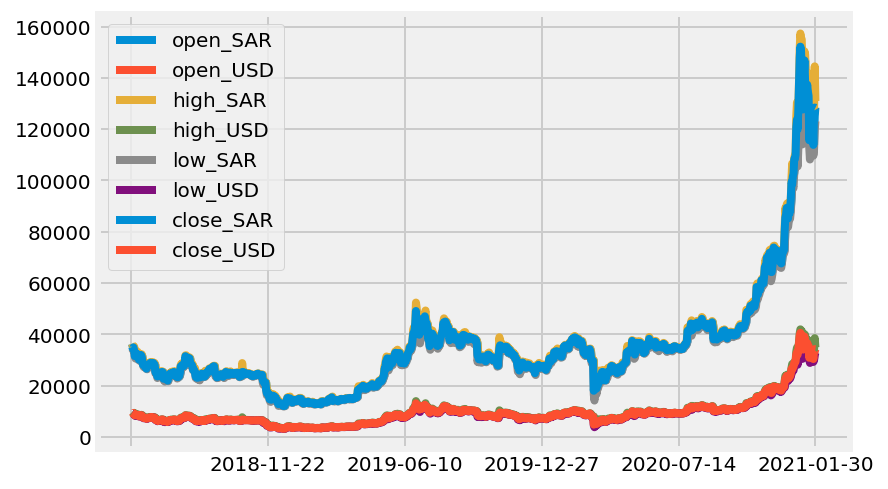

In [68]:
# ploting overall data

dc_.iloc[:,:-1].plot()
plt.gca().invert_xaxis()

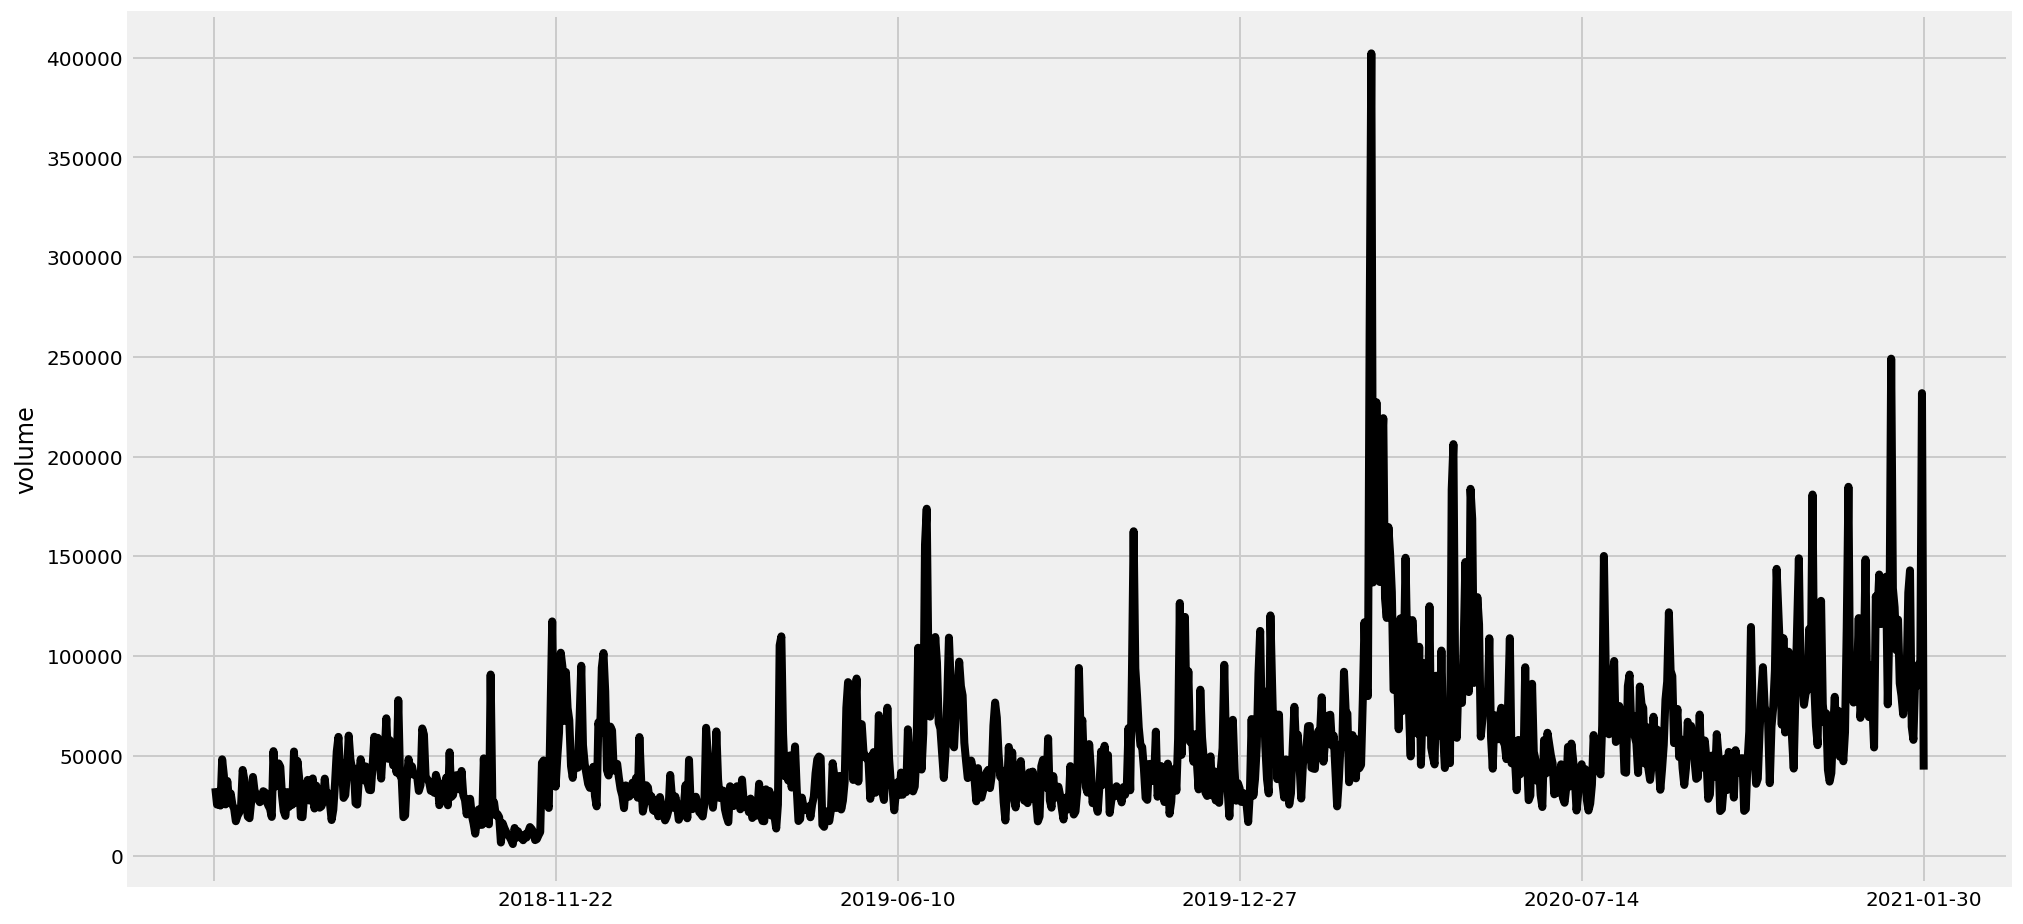

In [73]:
# plotting volume

plt.figure(figsize=(15,8))
dc_['volume'].plot(color='black').set(ylabel='volume')
plt.gca().invert_xaxis()